In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
survey_data = pd.read_csv("data/survey_data/Star Wars Galaxy's Edge Survey.csv")
survey_data.head()

,Timestamp,Age,Millennium Falcon: Smugglers Run,Star Wars: Rise of the Resistance,Savi's Workshop (Handbuilt Lightsabers),Droid Depot,Oga's Cantina,Docking Bay 7 Food and Cargo,Milk Stand,Ronto Roasters,Kat Saka's Kettle,Dok-Ondar's Den of Antiquities,Black Spire Outfitters,First Order Cargo,Resistance Supply,Creature Stall,Toydarian Toymaker,Disney Parks App,"Star Wars: Galactic Starcruiser (2-night, all-immersive adventure)"
0,2020/04/06 3:27:18 PM AST,35-44,5,5,5,4,5,5,4,5,4,5,5,3,3,2,2,5,5
1,2020/04/06 3:28:29 PM AST,25-34,5,5,5,5,5,3,5,4,4,5,4,3,4,4,4,2,3
2,2020/04/06 3:35:19 PM AST,35-44,4,5,5,4,4,4,4,4,4,5,3,4,4,3,3,2,5
3,2020/04/06 3:36:12 PM AST,Under 18,5,5,5,5,1,5,4,1,3,3,3,4,4,5,3,1,4
4,2020/04/06 3:36:48 PM AST,25-34,4,5,5,5,5,3,4,2,1,3,3,4,3,4,4,1,3


In [3]:
survey_data.rename(columns = {
                     "Savi's Workshop (Handbuilt Lightsabers)":"Savi's Workshop",
                     "Star Wars: Galactic Starcruiser (2-night, all-immersive adventure)":"Star Wars: Galactic Starcruiser"
                        },         
                    inplace = True)

survey_data.head()

,Timestamp,Age,Millennium Falcon: Smugglers Run,Star Wars: Rise of the Resistance,Savi's Workshop,Droid Depot,Oga's Cantina,Docking Bay 7 Food and Cargo,Milk Stand,Ronto Roasters,Kat Saka's Kettle,Dok-Ondar's Den of Antiquities,Black Spire Outfitters,First Order Cargo,Resistance Supply,Creature Stall,Toydarian Toymaker,Disney Parks App,Star Wars: Galactic Starcruiser
0,2020/04/06 3:27:18 PM AST,35-44,5,5,5,4,5,5,4,5,4,5,5,3,3,2,2,5,5
1,2020/04/06 3:28:29 PM AST,25-34,5,5,5,5,5,3,5,4,4,5,4,3,4,4,4,2,3
2,2020/04/06 3:35:19 PM AST,35-44,4,5,5,4,4,4,4,4,4,5,3,4,4,3,3,2,5
3,2020/04/06 3:36:12 PM AST,Under 18,5,5,5,5,1,5,4,1,3,3,3,4,4,5,3,1,4
4,2020/04/06 3:36:48 PM AST,25-34,4,5,5,5,5,3,4,2,1,3,3,4,3,4,4,1,3


In [4]:
consideration_grouped = survey_data.iloc[:, 1:19]

consideration_grouped

,Age,Millennium Falcon: Smugglers Run,Star Wars: Rise of the Resistance,Savi's Workshop,Droid Depot,Oga's Cantina,Docking Bay 7 Food and Cargo,Milk Stand,Ronto Roasters,Kat Saka's Kettle,Dok-Ondar's Den of Antiquities,Black Spire Outfitters,First Order Cargo,Resistance Supply,Creature Stall,Toydarian Toymaker,Disney Parks App,Star Wars: Galactic Starcruiser
0,35-44,5,5,5,4,5,5,4,5,4,5,5,3,3,2,2,5,5
1,25-34,5,5,5,5,5,3,5,4,4,5,4,3,4,4,4,2,3
2,35-44,4,5,5,4,4,4,4,4,4,5,3,4,4,3,3,2,5
3,Under 18,5,5,5,5,1,5,4,1,3,3,3,4,4,5,3,1,4
4,25-34,4,5,5,5,5,3,4,2,1,3,3,4,3,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,18-24,5,5,3,3,5,5,3,4,4,5,3,3,5,4,3,3,3
161,35-44,4,5,3,3,3,3,3,4,1,3,2,1,1,2,1,3,2
162,25-34,5,5,5,5,5,4,4,3,3,5,4,5,5,4,4,5,3
163,18-24,5,5,3,3,3,2,4,3,2,4,3,3,2,2,1,3,4


In [5]:
consideration_grouped = consideration_grouped.groupby('Age').agg('sum')

consideration_grouped

,Millennium Falcon: Smugglers Run,Star Wars: Rise of the Resistance,Savi's Workshop,Droid Depot,Oga's Cantina,Docking Bay 7 Food and Cargo,Milk Stand,Ronto Roasters,Kat Saka's Kettle,Dok-Ondar's Den of Antiquities,Black Spire Outfitters,First Order Cargo,Resistance Supply,Creature Stall,Toydarian Toymaker,Disney Parks App,Star Wars: Galactic Starcruiser
Age,,,,,,,,,,,,,,,,,
18-24,128,137,102,95,120,87,87,94,58,115,84,82,76,82,82,79,73
25-34,367,411,326,284,359,292,276,311,200,321,242,240,241,243,232,243,260
35-44,143,160,120,107,131,106,93,107,78,120,84,93,95,87,84,97,111
45-54,49,53,44,34,32,33,30,35,25,35,35,33,33,35,34,32,36
55-64,8,10,8,8,7,8,7,8,7,8,8,7,6,7,8,7,6
Under 18,30,30,28,27,19,24,23,19,14,23,14,19,20,21,17,17,16


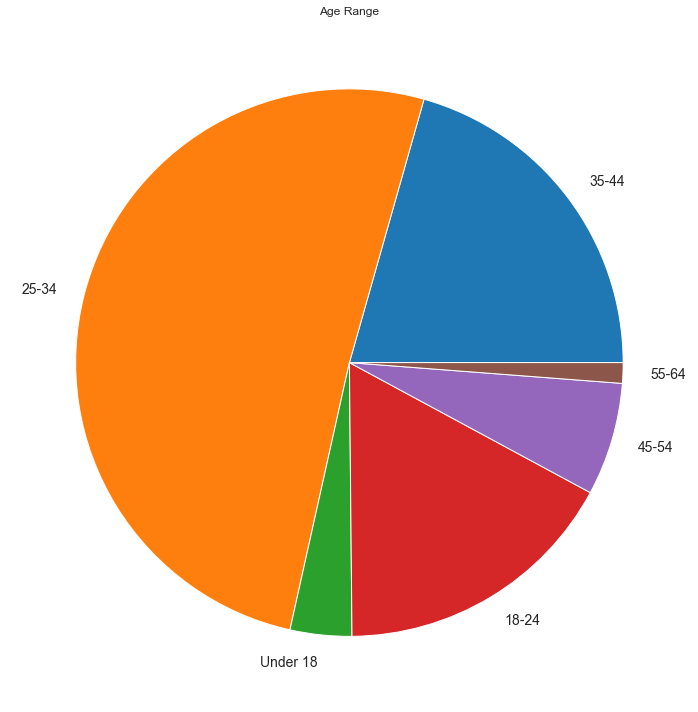

In [6]:
age = pd.Series(Counter(survey_data.Age.str.split(',').sum()))

age.sort_values(ascending=False)

age.plot(
    kind='pie',
    figsize=(10, 10),
    fontsize=14,
    title="Age Range"
    ).yaxis.label.set_visible(False)

plt.tight_layout()

plt.savefig('images/age.png')

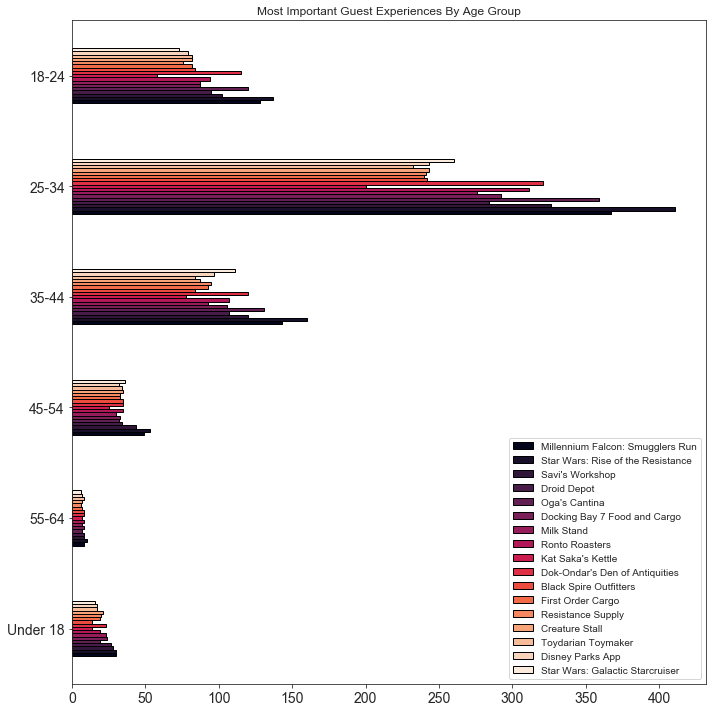

In [7]:
consideration_grouped.sort_index(ascending=False).plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Most Important Guest Experiences By Age Group'
    ).yaxis.label.set_visible(False)

plt.tight_layout()

plt.savefig('images/age_grouped.png')

In [8]:
def plot_counts_by_age_group(groupby_count_obj, Age, ax=None):
    
    sort_order = groupby_count_obj.loc[Age].sort_index().index

    sns.barplot(y = groupby_count_obj.loc[Age].index, 
                x = groupby_count_obj.loc[Age].values, 
                order = sort_order, 
                palette = 'rocket', edgecolor = 'black', 
                ax = ax
                ).set_title("Age {}".format(Age))

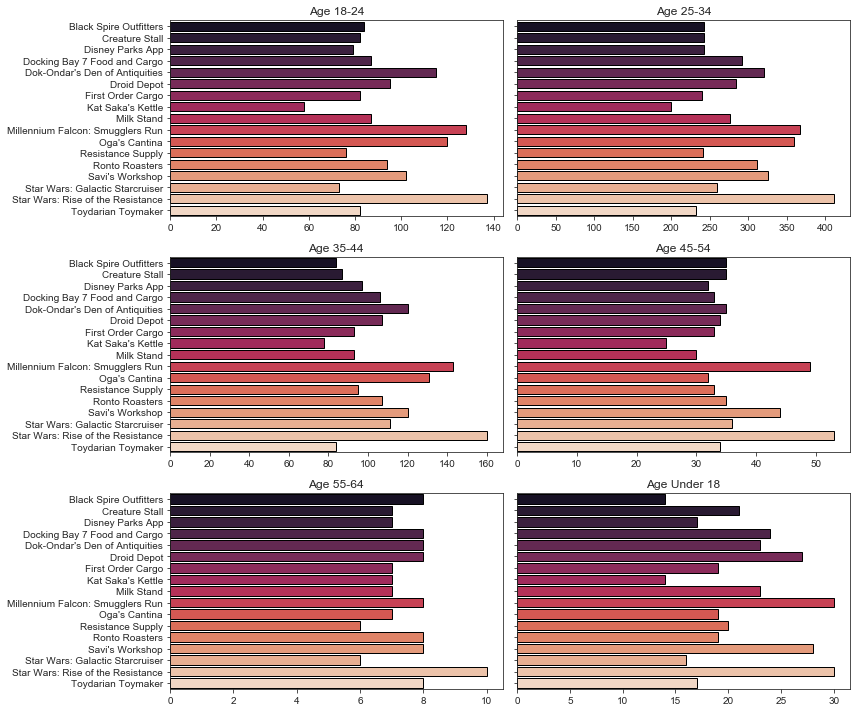

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), sharey=True)

for subplot, Age in zip(ax.flatten(), list(consideration_grouped.index)):
    plot_counts_by_age_group(consideration_grouped, Age, ax=subplot)
    
plt.tight_layout()

plt.savefig('images/age_seperate.png')

In [10]:
benefits_encoded = survey_data.iloc[:, 2:19]

benefits_encoded

,Millennium Falcon: Smugglers Run,Star Wars: Rise of the Resistance,Savi's Workshop,Droid Depot,Oga's Cantina,Docking Bay 7 Food and Cargo,Milk Stand,Ronto Roasters,Kat Saka's Kettle,Dok-Ondar's Den of Antiquities,Black Spire Outfitters,First Order Cargo,Resistance Supply,Creature Stall,Toydarian Toymaker,Disney Parks App,Star Wars: Galactic Starcruiser
0,5,5,5,4,5,5,4,5,4,5,5,3,3,2,2,5,5
1,5,5,5,5,5,3,5,4,4,5,4,3,4,4,4,2,3
2,4,5,5,4,4,4,4,4,4,5,3,4,4,3,3,2,5
3,5,5,5,5,1,5,4,1,3,3,3,4,4,5,3,1,4
4,4,5,5,5,5,3,4,2,1,3,3,4,3,4,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,5,5,3,3,5,5,3,4,4,5,3,3,5,4,3,3,3
161,4,5,3,3,3,3,3,4,1,3,2,1,1,2,1,3,2
162,5,5,5,5,5,4,4,3,3,5,4,5,5,4,4,5,3
163,5,5,3,3,3,2,4,3,2,4,3,3,2,2,1,3,4


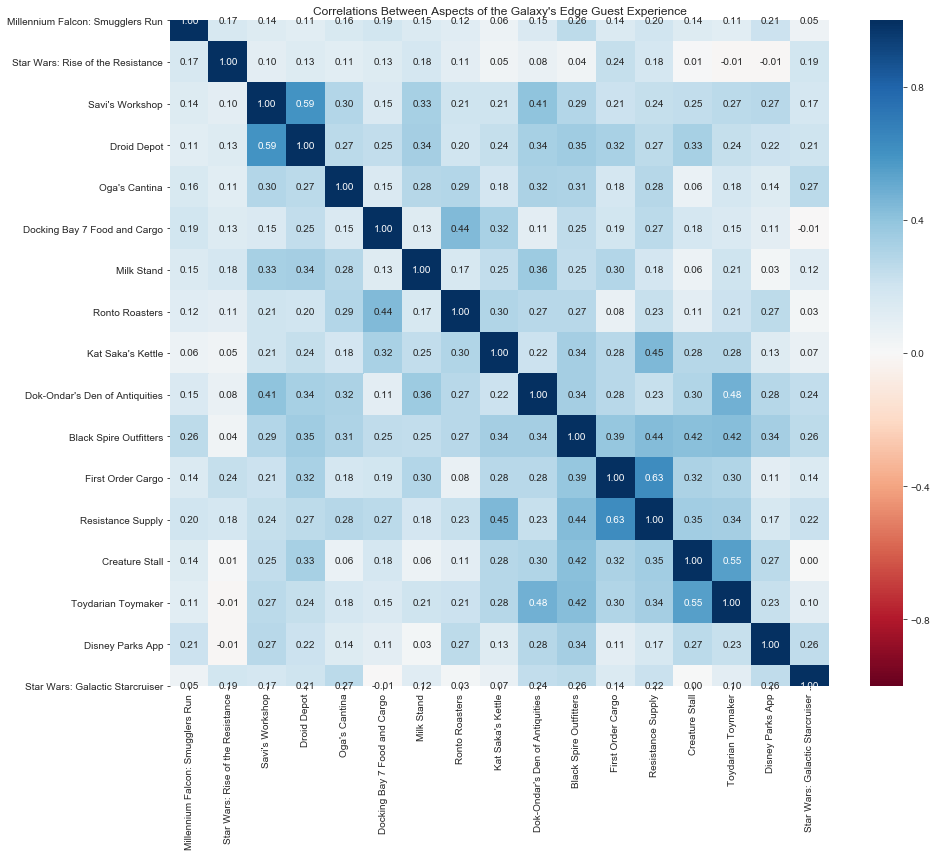

In [11]:
corr_matrix = benefits_encoded.corr(method='spearman')

fig, ax = plt.subplots(figsize=(14, 12))

sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

plt.title("Correlations Between Aspects of the Galaxy's Edge Guest Experience")

plt.tight_layout()

plt.savefig('images/corrmatrix.png')

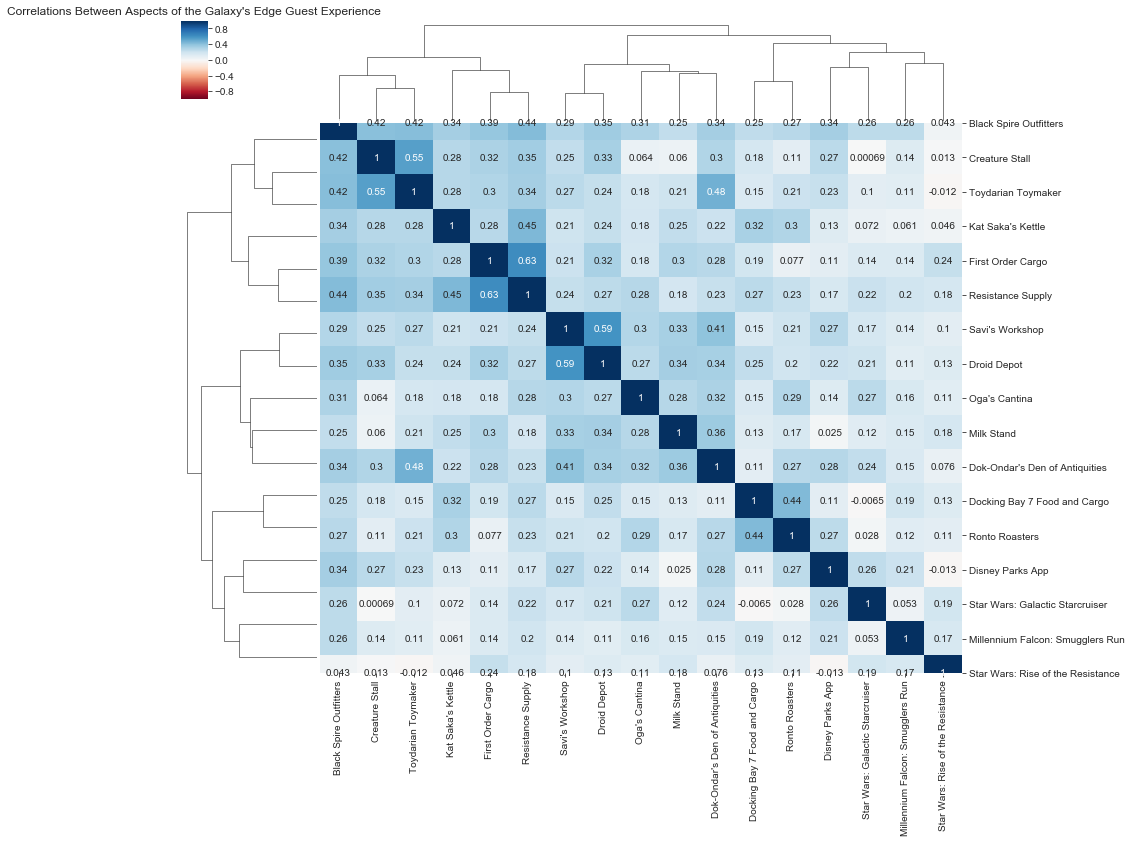

In [12]:
sns.clustermap(corr_matrix, method='ward', cmap='RdBu', annot=True,
               vmin=-1, vmax=1, figsize=(14,12))

plt.title("Correlations Between Aspects of the Galaxy's Edge Guest Experience")

plt.tight_layout()

plt.savefig('images/clustermap.png')